In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from nltk.corpus import stopwords, wordnet
import seaborn as sns
import contractions
import re
import string
from nltk.tokenize import word_tokenize
from collections import Counter
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from nltk.probability import FreqDist
from palettable.colorbrewer.qualitative import Pastel1_7
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
#loading the dataset
# tweet_df=train = pd.read_csv('C:\\Users\\dsnik\\Jupyter_Workspace/Final_p/train.csv')
tweet_df=train = pd.read_csv('C:\\Users\\dsnik\\Jupyter_Workspace/Final_p/train.csv')

In [3]:
tweet_df.head()

textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment  
0  I`d have responded, if I were going   neutral  
1                             Sooo SAD  negative  
2                          bullying me  negative  
3                       leave me alone  negative  
4                        Sons of ****,  negative

In [4]:
print(tweet_df.shape)

(27481, 4)


In [5]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27479 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [6]:
#Checking for null values
null_val=tweet_df.isna().sum()
null_val

textID           0
text             1
selected_text    2
sentiment        0
dtype: int64

<AxesSubplot:xlabel='Feature', ylabel='MissingCount'>

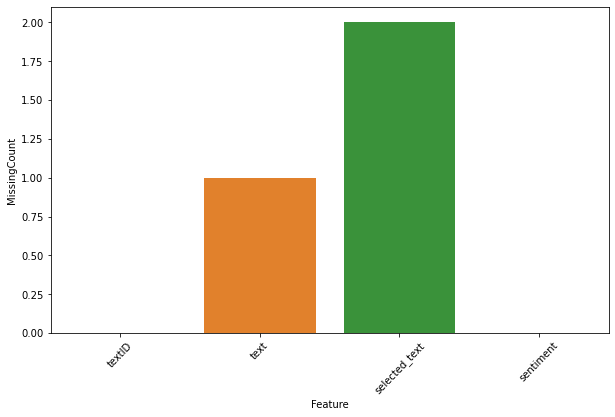

In [7]:
#Plotting the count of nulls in each column
null_val = pd.DataFrame(null_val)
null_val.reset_index(inplace = True)
null_val.columns = ["Feature","MissingCount"]
plt.figure(figsize = (10,6))
plt.xticks(rotation=46)
sns.barplot(x = "Feature",y ="MissingCount",data = null_val)

In [8]:
#dropping selected_text column
tweet_df.drop('selected_text', axis=1, inplace=True)
tweet_df.head()

textID                                               text sentiment
0  cb774db0d1                I`d have responded, if I were going   neutral
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!  negative
2  088c60f138                          my boss is bullying me...  negative
3  9642c003ef                     what interview! leave me alone  negative
4  358bd9e861   Sons of ****, why couldn`t they put them on t...  negative

In [9]:
#printing the missing value
tweet_df[tweet_df.isna().any(axis=1)]

textID text sentiment
314  fdb77c3752  NaN   neutral

In [10]:
#replacing the missing value
# text has only 1 missing value with neutral sentiment, lets replace the null with a neural statement
tweet_df["text"].fillna("It's interesting", inplace = True)
tweet_df.isna().sum()

textID       0
text         0
sentiment    0
dtype: int64

In [11]:
# Sentiment Distribution
tweet=train['sentiment'].value_counts()
tweet

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

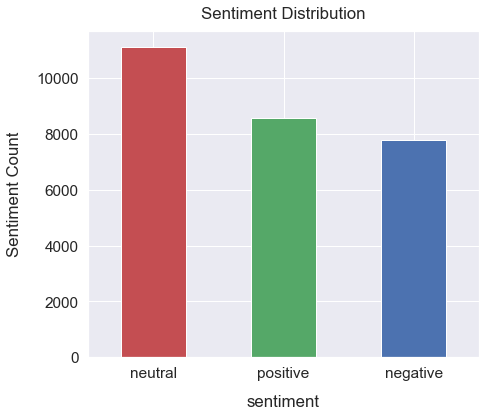

In [12]:
# Distribution plots based on sentiment
sns.set(font_scale=1.4)
tweet_df['sentiment'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0, color=["r", "g", "b"])

plt.xlabel("sentiment", labelpad=14)
plt.ylabel("Sentiment Count", labelpad=14)
plt.title("Sentiment Distribution", y=1.02);


<AxesSubplot:ylabel='sentiment'>

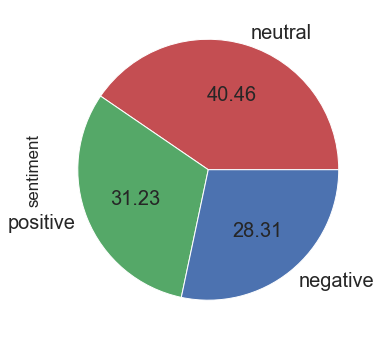

In [13]:
tweet.plot.pie(
    labels=["neutral", "positive", "negative"],
    colors=["r", "g", "b"],
    autopct="%.2f",
    fontsize=20,
    figsize=(6, 6),
)

In [14]:
#most frequently used words
tweet_df['freq_words'] = tweet_df['text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in tweet_df['freq_words'] for item in sublist])
tweety= pd.DataFrame(top.most_common(10))
tweety.columns = ['freq_words','Word_count']
tweety.style.background_gradient(cmap='Oranges')

# Data Pre-Processing 

### Standardization

In [15]:
#standardization on Text - converting all the data to lowercase
tweet_df["text_lowerCase"] = tweet_df["text"].apply(lambda t: t.lower())

### Contraction Removal

In [16]:
#Removing text Contractions
#many of the words have contractions in them, removing contractions helps in text standardization
tweet_df['no_txt_contrac'] = tweet_df['text_lowerCase'].apply(lambda t: ' '.join([contractions.fix(word) for word in str(t).replace('`', '\'').split()]))

In [38]:
#Cleaning the data by removing square breackets, http, url, special characters, punctuations and text/words containg numbers 

def tweet_df_clean(no_txt_contrac):
    no_txt_contrac = re.sub('\[.*?\]', '', no_txt_contrac) #square brackets
    no_txt_contrac = re.sub('https?://\S+|www\.\S+', '', no_txt_contrac) #https
    no_txt_contrac = re.sub('<.*?>+', '', no_txt_contrac) #special char
    no_txt_contrac = re.sub('[%s]' % re.escape(string.punctuation), '', no_txt_contrac) #punctuations
    no_txt_contrac = re.sub('\n', '', no_txt_contrac) #spaces
    no_txt_contrac = re.sub('\w*\d\w*', '', no_txt_contrac) #words/sentances with numbers    
    
    return no_txt_contrac
#printing the cleaned data
tweet_df['Clean_text'] = tweet_df['no_txt_contrac'].apply(lambda t:tweet_df_clean(t))
tweet_df.head(4)

textID                                            text sentiment  \
0  cb774db0d1             I`d have responded, if I were going   neutral   
1  549e992a42   Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                       my boss is bullying me...  negative   
3  9642c003ef                  what interview! leave me alone  negative   

                      freq_words  \
0           [would, respond, go]   
1  [sooo, sad, miss, san, diego]   
2                   [bos, bully]   
3      [interview, leave, alone]   

                                   text_lowerCase  \
0             i`d have responded, if i were going   
1   sooo sad i will miss you here in san diego!!!   
2                       my boss is bullying me...   
3                  what interview! leave me alone   

                                  no_txt_contrac       punc  \
0        i would have responded, if i were going     [`, ,]   
1  sooo sad i will miss you here in san diego!!!  [!, !, !]   
2                      my boss is bullying me...  [., ., .]   
3                 what interview! leave me alone        [!]   

                                   Clean_text  \
0      i would have responded if i were going   
1  sooo sad i will miss you here in san diego   
2                      my boss is bullying me   
3               what interview leave me alone   

                                      tokenized_text  \
0    [i, would, have, responded, if, i, were, going]   
1  [sooo, sad, i, will, miss, you, here, in, san,...   
2                       [my, boss, is, bullying, me]   
3                [what, interview, leave, me, alone]   

                       stopwords  \
0      [would, responded, going]   
1  [sooo, sad, miss, san, diego]   
2               [boss, bullying]   
3      [interview, leave, alone]   

                                             Tagging  \
0           [(would, n), (responded, v), (going, v)]   
1  [(sooo, a), (sad, a), (miss, n), (san, n), (di...   
2                         [(boss, n), (bullying, v)]   
3           [(interview, n), (leave, v), (alone, r)]   

                   lemmatization  text_length  word_count  \
0           [would, respond, go]           38           8   
1  [sooo, sad, miss, san, diego]           42          10   
2                   [bos, bully]           22           5   
3      [interview, leave, alone]           29           5   

              lemmatizated  
0         would respond go  
1  sooo sad miss san diego  
2                bos bully  
3    interview leave alone

### Tokenization

In [39]:
#tokenizing the text
#In order for this sentence to be understood by a machine, tokenization is performed on the string to break it into individual parts
tweet_df['tokenized_text'] = tweet_df['Clean_text'].apply(word_tokenize)
tweet_df.head(4)

textID                                            text sentiment  \
0  cb774db0d1             I`d have responded, if I were going   neutral   
1  549e992a42   Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                       my boss is bullying me...  negative   
3  9642c003ef                  what interview! leave me alone  negative   

                      freq_words  \
0           [would, respond, go]   
1  [sooo, sad, miss, san, diego]   
2                   [bos, bully]   
3      [interview, leave, alone]   

                                   text_lowerCase  \
0             i`d have responded, if i were going   
1   sooo sad i will miss you here in san diego!!!   
2                       my boss is bullying me...   
3                  what interview! leave me alone   

                                  no_txt_contrac       punc  \
0        i would have responded, if i were going     [`, ,]   
1  sooo sad i will miss you here in san diego!!!  [!, !, !]   
2                      my boss is bullying me...  [., ., .]   
3                 what interview! leave me alone        [!]   

                                   Clean_text  \
0      i would have responded if i were going   
1  sooo sad i will miss you here in san diego   
2                      my boss is bullying me   
3               what interview leave me alone   

                                      tokenized_text  \
0    [i, would, have, responded, if, i, were, going]   
1  [sooo, sad, i, will, miss, you, here, in, san,...   
2                       [my, boss, is, bullying, me]   
3                [what, interview, leave, me, alone]   

                       stopwords  \
0      [would, responded, going]   
1  [sooo, sad, miss, san, diego]   
2               [boss, bullying]   
3      [interview, leave, alone]   

                                             Tagging  \
0           [(would, n), (responded, v), (going, v)]   
1  [(sooo, a), (sad, a), (miss, n), (san, n), (di...   
2                         [(boss, n), (bullying, v)]   
3           [(interview, n), (leave, v), (alone, r)]   

                   lemmatization  text_length  word_count  \
0           [would, respond, go]           38           8   
1  [sooo, sad, miss, san, diego]           42          10   
2                   [bos, bully]           22           5   
3      [interview, leave, alone]           29           5   

              lemmatizated  
0         would respond go  
1  sooo sad miss san diego  
2                bos bully  
3    interview leave alone

### Stopwords Removal

In [21]:
#Removing Stopword from text
#Stopwords are the commonly used words that they carry very little useful information
stop = set(stopwords.words('english'))
tweet_df['stopwords'] = tweet_df['tokenized_text'].apply(lambda t: [word for word in t if word not in stop])
tweet_df.head(4)

### Parts-of-Speech Tagging

In [ ]:
# After we have tokenized and removed stop words 
#Lets add POS(Parts of speeech) tagging to each word
tweet_df['Tagging'] = tweet_df['stopwords'].apply(lambda t: nltk.tag.pos_tag(t))

# now converting them to adjective, verb, noun and adverb
def get_Tagging(Tagging):
    if Tagging.startswith('J'):
        return wordnet.ADJ
    elif Tagging.startswith('V'):
        return wordnet.VERB
    elif Tagging.startswith('N'):
        return wordnet.NOUN
    elif Tagging.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

    
tweet_df['Tagging'] = tweet_df['Tagging'].apply(lambda x: [(word, get_Tagging(Tagging)) 
                                                               for (word, Tagging) in x])
tweet_df.head(4)

### Tokenization

In [23]:
#converting a word to its meaningful base or root form by Lemmatization
from nltk.stem import WordNetLemmatizer
lm = nltk.WordNetLemmatizer()
tweet_df['lemmatization'] = tweet_df['Tagging'].apply(lambda m:[lm.lemmatize(w,t) for w ,t in m])

tweet_df.head()

textID                                               text sentiment  \
0  cb774db0d1                I`d have responded, if I were going   neutral   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                          my boss is bullying me...  negative   
3  9642c003ef                     what interview! leave me alone  negative   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...  negative   

                                          freq_words  \
0        [I`d, have, responded,, if, I, were, going]   
1  [Sooo, SAD, I, will, miss, you, here, in, San,...   
2                    [my, boss, is, bullying, me...]   
3               [what, interview!, leave, me, alone]   
4  [Sons, of, ****,, why, couldn`t, they, put, th...   

                                      text_lowerCase  \
0                i`d have responded, if i were going   
1      sooo sad i will miss you here in san diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   sons of ****, why couldn`t they put them on t...   

                                      no_txt_contrac                punc  \
0            i would have responded, if i were going              [`, ,]   
1      sooo sad i will miss you here in san diego!!!           [!, !, !]   
2                          my boss is bullying me...           [., ., .]   
3                     what interview! leave me alone                 [!]   
4  sons of ****, why could not they put them on t...  [*, *, *, *, ,, `]   

                                          Clean_text  \
0             i would have responded if i were going   
1         sooo sad i will miss you here in san diego   
2                             my boss is bullying me   
3                      what interview leave me alone   
4  sons of  why could not they put them on the re...   

                                      tokenized_text  \
0    [i, would, have, responded, if, i, were, going]   
1  [sooo, sad, i, will, miss, you, here, in, san,...   
2                       [my, boss, is, bullying, me]   
3                [what, interview, leave, me, alone]   
4  [sons, of, why, could, not, they, put, them, o...   

                                       stopwords  \
0                      [would, responded, going]   
1                  [sooo, sad, miss, san, diego]   
2                               [boss, bullying]   
3                      [interview, leave, alone]   
4  [sons, could, put, releases, already, bought]   

                                             Tagging  \
0           [(would, n), (responded, v), (going, v)]   
1  [(sooo, a), (sad, a), (miss, n), (san, n), (di...   
2                         [(boss, n), (bullying, v)]   
3           [(interview, n), (leave, v), (alone, r)]   
4  [(sons, n), (could, n), (put, v), (releases, n...   

                              lemmatization  
0                      [would, respond, go]  
1             [sooo, sad, miss, san, diego]  
2                              [bos, bully]  
3                 [interview, leave, alone]  
4  [son, could, put, release, already, buy]

## Let us analyze our texts:

### Finding Text Length & Word frequency


In [24]:
# using Clean_text for creating new columns ie. text_length and word_count
tweet_df['text_length'] = tweet_df['Clean_text'].astype(str).apply(len)
tweet_df['word_count'] = tweet_df['Clean_text'].apply(lambda t : len(str(t).split()))

In [25]:
tweet_df['freq_words'] = tweet_df['lemmatization']

In [26]:
# creating 3 different dataframes based on our sentiment
Pos_sent = tweet_df[tweet_df['sentiment'] == 'positive']
Neg_sent = tweet_df[tweet_df['sentiment'] == 'negative']
Neu_sent = tweet_df[tweet_df['sentiment'] == 'neutral']

### Text Length Analysis

In [27]:
#Sentiment wise text length distribution
pos = go.Violin(
    y=Pos_sent['text_length'],
    name = 'Positive tweet',
    marker = dict(
        color = 'green',
    )
)

neg = go.Violin(
    y=Neg_sent['text_length'],
    name = 'Negative tweet',
    marker = dict(
        color = 'red',
    )
)

neu = go.Violin(
    y=Neu_sent['text_length'],
    name = 'Neutral tweet',
    marker = dict(
        color = 'orange',
    )
)
list = [pos, neg, neu]
layout = go.Layout(
    title = "Sentiment wise text length"
)

length_of_text = go.Figure(data=list,layout=layout)
iplot(length_of_text, filename = "Sentiment wise text length")

### Word Count Analysis

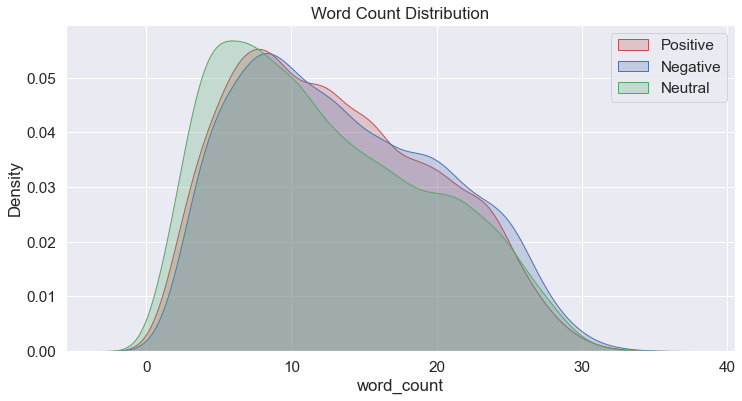

In [58]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(Pos_sent['word_count'], shade=True, color="r").set_title('Word Count Distribution')
p1=sns.kdeplot(Neg_sent['word_count'], shade=True, color="b")
p1=sns.kdeplot(Neu_sent['word_count'], shade=True, color="g")
plt.legend(labels =["Positive","Negative","Neutral"])

### Most Frequent Words In Each Sentiment

##### Positive

In [28]:
#most common or frequent word in positive sentiments
pos_itive = Counter([item for sublist in Pos_sent['freq_words'] for item in sublist])
words_positive = pd.DataFrame(pos_itive.most_common(20))
words_positive.columns = ['Frequent_words','word_count']
pos_itive_w = px.treemap(words_positive, path=['Frequent_words'], values='word_count',title='Most Frequent Positive Words')
pos_itive_w.show()

C:\Users\dsnik\anaconda3\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



##### Negative

In [48]:
#most common or frequent word in Negative sentiments
neg_itive = Counter([item for sublist in Neg_sent['freq_words'] for item in sublist])
words_negative = pd.DataFrame(neg_itive.most_common(20))
words_negative.columns = ['Frequent_words','word_count']
Negative_chart= px.bar(words_negative, x="word_count", y="Frequent_words", title='Frequent Negative Words', orientation='h', 
             width=700, height=700,color='Frequent_words')
Negative_chart.show()

##### Neutral

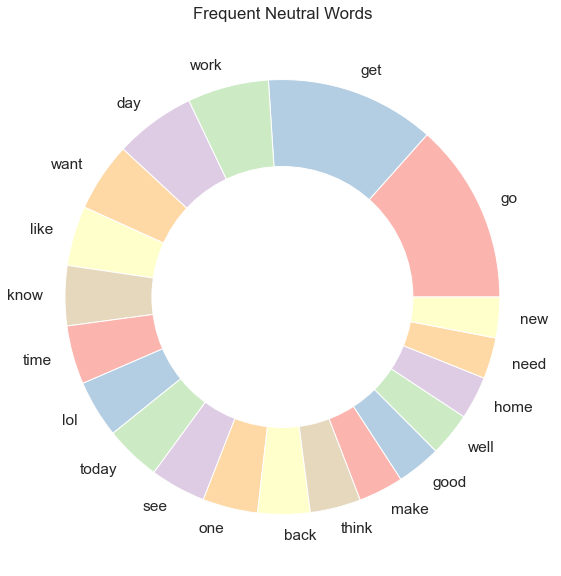

In [30]:
#most common or frequent word in neutral sentiments
Neu_tral = Counter([item for sublist in Neu_sent['freq_words'] for item in sublist])
words_neutral = pd.DataFrame(Neu_tral.most_common(20))
words_neutral.columns = ['Frequent_words','word_count']
plt.figure(figsize=(18,10))
my_donut=plt.Circle((0,0), 0.6, color='white')
plt.pie(words_neutral['word_count'], labels=words_neutral.Frequent_words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_donut)
plt.title('Frequent Neutral Words')
plt.show()

### Word Cloud For Tweets Based On Sentiments

##### Word Cloud for Positive Tweets

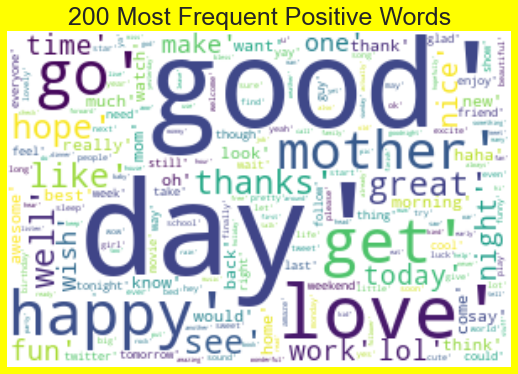

In [32]:
#positive tweets Wordcloud
words = []
for w in Pos_sent['lemmatization'].values:
    words+=w
mostcommon = FreqDist(words).most_common(200)

wordcloud = WordCloud(width=300, height=200, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(10,5), facecolor='yellow')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('200 Most Frequent Positive Words', fontsize=25)
plt.tight_layout(pad=0)
plt.show()

##### Word Cloud for Negative Tweets

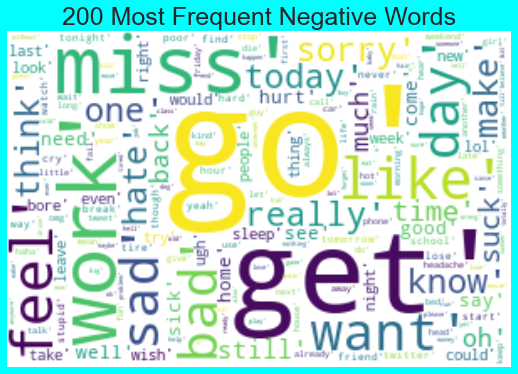

In [41]:
#Negative tweets Wordcloud
words = []
for w in Neg_sent['lemmatization'].values:
    words+=w
mostcommon = FreqDist(words).most_common(200)

wordcloud = WordCloud(width=300, height=200, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(10,5), facecolor='cyan')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('200 Most Frequent Negative Words', fontsize=25)
plt.tight_layout(pad=0)
plt.show()

##### Word Cloud for Neutral Tweets

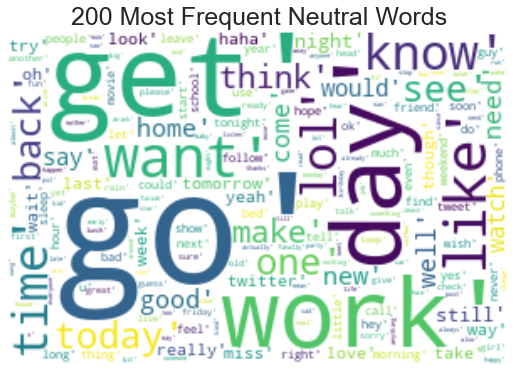

In [57]:
#Neutral tweets Wordcloud
words = []
for w in Neu_sent['lemmatization'].values:
    words+=w
mostcommon = FreqDist(words).most_common(200)

wordcloud = WordCloud(width=300, height=200, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(10,5), facecolor='White')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('200 Most Frequent Neutral Words', fontsize=25)
plt.tight_layout(pad=0)
plt.show()

### Unique Words

Text(0.5, 0.98, 'Common words in tweet text')

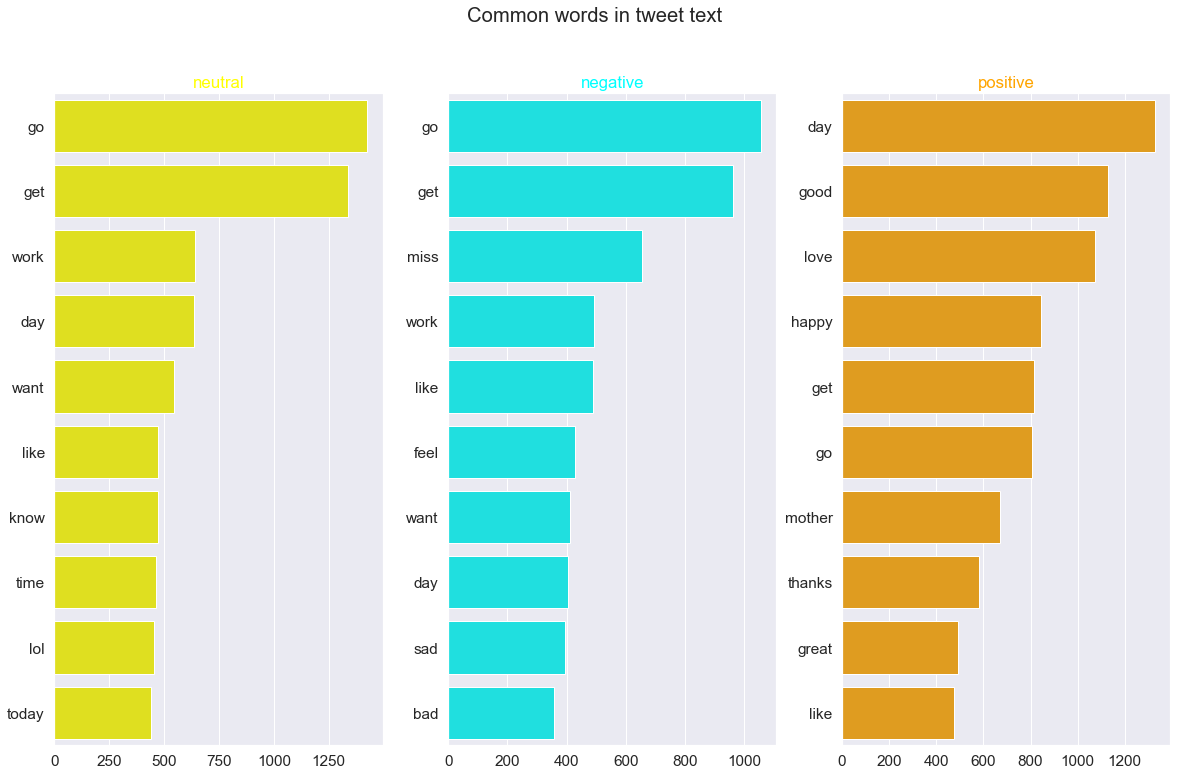

In [36]:
sent=tweet_df.sentiment.unique()
colors=['yellow','cyan','orange']
fig,ax=plt.subplots(1,3,figsize=(20,12))
for i in range(3):
    unique_words=tweet_df[tweet_df['sentiment']==sent[i]]['lemmatization']
    uni_word=[p for pun in unique_words.values for p in pun]
    counter=Counter(uni_word).most_common(10)
    x=[]
    y=[]
    for word,count in counter[:20]:
        if (word not in stop) :
            x.append(word)
            y.append(count)
    sns.barplot(x=y,y=x,ax=ax[i],color=colors[i])
    ax[i].set_title(sent[i],color=colors[i])
fig.suptitle("Unique words based on Sentiment")

In [42]:
tweet_df['lemm_Join'] = tweet_df['lemmatization'].apply(lambda l: ' '.join(l))
tweet_df.head(4)

textID                                               text sentiment  \
0  cb774db0d1                I`d have responded, if I were going   neutral   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!  negative   
2  088c60f138                          my boss is bullying me...  negative   
3  9642c003ef                     what interview! leave me alone  negative   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...  negative   

                                 freq_words  \
0                      [would, respond, go]   
1             [sooo, sad, miss, san, diego]   
2                              [bos, bully]   
3                 [interview, leave, alone]   
4  [son, could, put, release, already, buy]   

                                      text_lowerCase  \
0                i`d have responded, if i were going   
1      sooo sad i will miss you here in san diego!!!   
2                          my boss is bullying me...   
3                     what interview! leave me alone   
4   sons of ****, why couldn`t they put them on t...   

                                      no_txt_contrac                punc  \
0            i would have responded, if i were going              [`, ,]   
1      sooo sad i will miss you here in san diego!!!           [!, !, !]   
2                          my boss is bullying me...           [., ., .]   
3                     what interview! leave me alone                 [!]   
4  sons of ****, why could not they put them on t...  [*, *, *, *, ,, `]   

                                          Clean_text  \
0             i would have responded if i were going   
1         sooo sad i will miss you here in san diego   
2                             my boss is bullying me   
3                      what interview leave me alone   
4  sons of  why could not they put them on the re...   

                                      tokenized_text  \
0    [i, would, have, responded, if, i, were, going]   
1  [sooo, sad, i, will, miss, you, here, in, san,...   
2                       [my, boss, is, bullying, me]   
3                [what, interview, leave, me, alone]   
4  [sons, of, why, could, not, they, put, them, o...   

                                       stopwords  \
0                      [would, responded, going]   
1                  [sooo, sad, miss, san, diego]   
2                               [boss, bullying]   
3                      [interview, leave, alone]   
4  [sons, could, put, releases, already, bought]   

                                             Tagging  \
0           [(would, n), (responded, v), (going, v)]   
1  [(sooo, a), (sad, a), (miss, n), (san, n), (di...   
2                         [(boss, n), (bullying, v)]   
3           [(interview, n), (leave, v), (alone, r)]   
4  [(sons, n), (could, n), (put, v), (releases, n...   

                              lemmatization  text_length  word_count  \
0                      [would, respond, go]           38           8   
1             [sooo, sad, miss, san, diego]           42          10   
2                              [bos, bully]           22           5   
3                 [interview, leave, alone]           29           5   
4  [son, could, put, release, already, buy]           70          14   

                        lemmatizated                          lemm_Join  
0                   would respond go                   would respond go  
1            sooo sad miss san diego            sooo sad miss san diego  
2                          bos bully                          bos bully  
3              interview leave alone              interview leave alone  
4  son could put release already buy  son could put release already buy